In [5]:
pip install opencv-python numpy matplotlib scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /home/anaconda/.conda/envs/jupyter/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Loading data
Done Loading data
Splitting data
Done Splitting data
Init Model
Fitting Model
Done Fitting Model
Predicting
Accuracy Calculation
Train Accuracy: 1.0000
Test Accuracy: 0.9004

Classification Report:
              precision    recall  f1-score   support

        Real       0.90      0.94      0.92      9912
          AI       0.90      0.84      0.87      6169

    accuracy                           0.90     16081
   macro avg       0.90      0.89      0.89     16081
weighted avg       0.90      0.90      0.90     16081

Confusion matrix saved as 'confusion_matrix_rf.png'


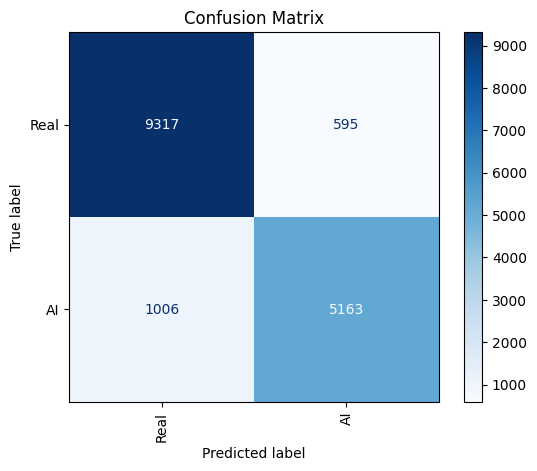

Feature importance plot saved as 'feature_importances_rf.png'


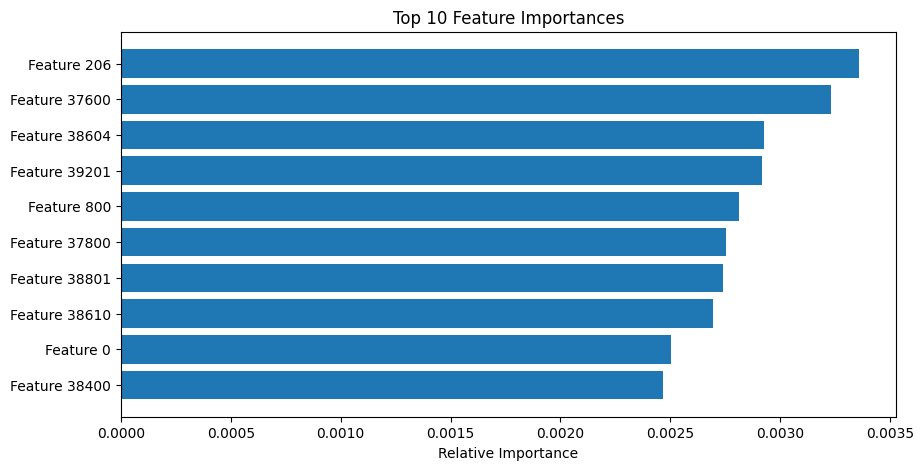

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Function to preprocess images using OpenCV
def preprocess_image(image_path):
    # Load image in BGR format
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")
    
    # Resize image
    image = cv2.resize(image, (200, 200))
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform Gaussian blur on CPU
    kernel_size = 5
    denoised_image = cv2.GaussianBlur(
        src=gray_image, ksize=(kernel_size, kernel_size), sigmaX=0
    )
    
    # Flatten the image
    denoised_image = denoised_image.flatten()
    return denoised_image

# Load dataset
def load_dataset(data_dir):
    features = []
    labels = []
    class_names = os.listdir(data_dir)
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            features.append(preprocess_image(image_path))
            labels.append(label)
    return np.array(features), np.array(labels), class_names

# Dataset directory
data_dir = "./reduced-dataset" 

# Load and preprocess data
print("Loading data")
features, labels, class_names = load_dataset(data_dir)
print("Done Loading data")

# Split dataset
print("Splitting data")
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)
print("Done Splitting data")

# Initialize and train the Random Forest model
print("Init Model")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=56)
print("Fitting Model")
rf_model.fit(train_features, train_labels)
print("Done Fitting Model")

# Predict on training and test sets
print("Predicting")
train_preds = rf_model.predict(train_features)
test_preds = rf_model.predict(test_features)

# Compute accuracy
print("Accuracy Calculation")
train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix_rf.png")
print("Confusion matrix saved as 'confusion_matrix_rf.png'")
plt.show()

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features

plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel("Relative Importance")
plt.title("Top 10 Feature Importances")
plt.savefig("feature_importances_rf.png")
print("Feature importance plot saved as 'feature_importances_rf.png'")
plt.show()

Balanced Performance: The model shows high precision and good recall for both classes, with a slightly higher recall for the Real class (0.94 vs. 0.84). This suggests that the model is slightly better at identifying instances of the Real class but still performs reasonably well for the AI class.

Overall Accuracy: The 90% accuracy indicates strong overall performance, meaning the model makes correct predictions for a significant majority of the data.

Class Imbalance Handling: Given that the recall for the AI class is lower than for the Real class, there might be some class imbalance. Despite this, the Random Forest model manages to perform well across both classes.

In [7]:
pip install joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /home/anaconda/.conda/envs/jupyter/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import joblib

# Export the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'
